In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBRegressor

In [3]:
boston = pd.read_csv('p2_mod.csv')
X = boston.drop(columns='Y', axis=1)
Y = boston['Y']
print(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [4]:
print(Y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [6]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[08:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [7]:
xgb.feature_importances_

array([0.01513778, 0.00834296, 0.01314037, 0.00878722, 0.00758466,
       0.44551325, 0.13677213, 0.04899508, 0.06273374, 0.04264376,
       0.03121655, 0.01728265, 0.00936145, 0.00913361, 0.00795344,
       0.00879614, 0.01008987, 0.02197303, 0.01800228, 0.02911551,
       0.02117017, 0.01164002, 0.01461437], dtype=float32)

In [8]:
perm_importance = permutation_importance(xgb, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

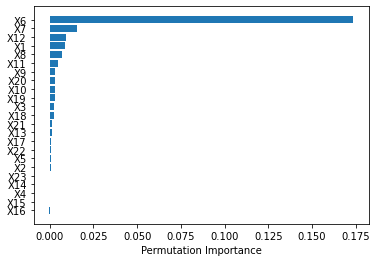

In [9]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [10]:
select = ["X6","X7", "X12", "X1", "X8", "X9", "X20", "X10","X18", "X19","Y"]
new_df = boston[select]

In [11]:
# x= boston.iloc[:,0:11].values
# y= boston.iloc[:,11].values
x = new_df.drop(columns='Y', axis=1)
y = new_df['Y']

In [12]:
print(x)

       X6  X7     X12      X1  X8  X9    X20  X10    X18    X19
0       2   2    3913   20000  -1  -1      0   -2      0    689
1      -1   2    2682  120000   0   0   1000    0      0   1000
2       0   0   29239   90000   0   0   1000    0   1518   1500
3       0   0   46990   50000   0   0   1200    0   2000   2019
4      -1   0    8617   50000  -1   0  10000    0   2000  36681
...    ..  ..     ...     ...  ..  ..    ...  ...    ...    ...
29995   0   0  188948  220000   0   0   5003    0   8500  20000
29996  -1  -1    1683  150000  -1  -1   8998    0   1837   3526
29997   4   3    3565   30000   2  -1  22000    0      0      0
29998   1  -1   -1645   80000   0   0   1178    0  85900   3409
29999   0   0   47929   50000   0   0   1430    0   2078   1800

[30000 rows x 10 columns]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

BFE

In [15]:
!pip install mlxtend

In [16]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [17]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s finished

[2022-03-23 08:38:46] Features: 9/1 -- score: 0.8102083333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished

[2022-03-23 08:38:48] Features: 8/1 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished

[2022-03-23 08:38:49] Features: 7/1 -- score: 0.8106249999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [18]:
sbs.k_feature_idx_

(0,)

In [19]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [20]:
df

,feature_idx,avg_score
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.810042
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)",0.810208
8,"(0, 1, 2, 3, 4, 5, 7, 9)",0.810417
7,"(0, 1, 2, 3, 5, 7, 9)",0.810625
6,"(0, 1, 2, 3, 5, 7)",0.810583
5,"(0, 2, 3, 5, 7)",0.811042
4,"(0, 3, 5, 7)",0.811583
3,"(0, 3, 7)",0.813167
2,"(0, 3)",0.812208
1,"(0,)",0.819667


In [21]:
sbs.subsets_

{1: {'avg_score': 0.8196666666666667,
  'cv_scores': array([0.823625, 0.819125, 0.81625 ]),
  'feature_idx': (0,),
  'feature_names': ('0',)},
 2: {'avg_score': 0.8122083333333333,
  'cv_scores': array([0.813375, 0.81075 , 0.8125  ]),
  'feature_idx': (0, 3),
  'feature_names': ('0', '3')},
 3: {'avg_score': 0.8131666666666666,
  'cv_scores': array([0.8135  , 0.812375, 0.813625]),
  'feature_idx': (0, 3, 7),
  'feature_names': ('0', '3', '7')},
 4: {'avg_score': 0.8115833333333334,
  'cv_scores': array([0.809625, 0.812125, 0.813   ]),
  'feature_idx': (0, 3, 5, 7),
  'feature_names': ('0', '3', '5', '7')},
 5: {'avg_score': 0.8110416666666667,
  'cv_scores': array([0.810375, 0.811875, 0.810875]),
  'feature_idx': (0, 2, 3, 5, 7),
  'feature_names': ('0', '2', '3', '5', '7')},
 6: {'avg_score': 0.8105833333333333,
  'cv_scores': array([0.81    , 0.811625, 0.810125]),
  'feature_idx': (0, 1, 2, 3, 5, 7),
  'feature_names': ('0', '1', '2', '3', '5', '7')},
 7: {'avg_score': 0.810624999999

Selected Features ID : (0,)


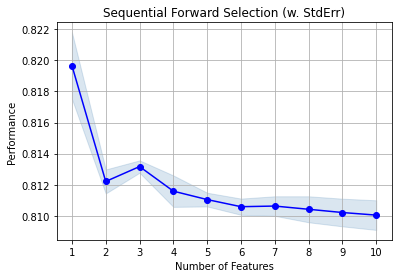

In [22]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [23]:
newdf = pd.DataFrame(X_train)
print(newdf)

              0         1         2         3         4         5         6  \
0      0.014796  0.109694  0.329670 -0.672359  0.141120  0.188700 -0.173567   
1      0.014796  0.109694 -0.295445 -1.057768  0.141120  0.188700 -0.241596   
2      0.014796  0.109694 -0.408879  0.098459 -0.698046 -0.667404 -0.288246   
3      0.014796  0.109694  0.107788 -0.826523  0.141120  0.188700 -0.178610   
4      0.014796  0.109694  0.826432 -0.286950  0.141120  0.188700 -0.014157   
...         ...       ...       ...       ...       ...       ...       ...   
23995  0.014796  0.109694  0.021084 -0.903605  0.141120  0.188700 -0.201031   
23996  1.790286  1.779631  1.446928  0.252623  1.819451  1.900908 -0.288246   
23997 -1.760694 -1.560243 -0.693841 -0.903605 -1.537212 -1.523508 -0.288246   
23998  0.014796  0.109694  0.313512 -0.749441  0.141120  0.188700 -0.041565   
23999 -1.760694 -1.560243 -0.694114 -0.055704 -1.537212 -1.523508 -0.116392   

              7         8         9  
0      0.2340

In [24]:
selected = list(sbs.k_feature_idx_)

In [25]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

              0
0      0.014796
1      0.014796
2      0.014796
3      0.014796
4      0.014796
...         ...
23995  0.014796
23996  1.790286
23997 -1.760694
23998  0.014796
23999 -1.760694

[24000 rows x 1 columns]


In [26]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [27]:
from sklearn import svm
from sklearn.svm import SVC

In [28]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

82.13541666666667

In [29]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.29166666666666


KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

KNeighborsClassifier()

In [31]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 78.14583333333334


DT

In [32]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [33]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 81.29166666666666


RF

In [34]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [35]:
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

Random Forest Accuracy: 81.29166666666666


LR

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 81.29166666666666
